# Artificial Intelligence
# 464/664
# Assignment #4

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested (it is your responsibility to make sure notebook looks as expected on Gradescope),
03. Each helper function should be preceeded by documentation (Markdown cell),
04. No comments in the code; anything worth mentioning should be included in the documentation,
05. Use descriptive variable names,
06. Functions should do only one thing,
07. Check submission deadline on Gradescope, 
08. Rename the file to Last_First_assignment_4, 
09. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
10. Do not submit any other files.

## Directions _not_ applicable for this Assignment:
* Do not use classes,
* Keep functions to 20 lines or less (including empty lines so do not add any),
* Each helper function should be followed by three assert-style unit tests.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

You might need to do a install to work with networkx

```
pip install networkx
```

## Map Coloring

It turns out that any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors (see [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem), for more details) This **Constraint Satisfaction Problem** can be viewed as a constraint graph, where variables are nodes and no adjacent nodes can be of the same color.


Our first constraint graph is the dictionary `connecticut_graph` with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.

In [2]:
connecticut_graph = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut_graph)
# print(len(connecticut_graph["nodes"]), len(connecticut_graph["coordinates"]))


{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


## degree_heuristic

Implements the Degree Heuristic for variable selection by choosing the unassigned variable (node) that has the highest degree, i.e., the most connections to other variables.

- node Int: the node we are considering
- nodes List[Str]: list of all nodes in the graph
- edges List[Tuple[Int, Int]]: list of edges in the graph, represented as tuples of node indices

### Returns:
- node Int: the node with the highest degree among unassigned nodes

In [3]:
def get_neighbors(node, nodes, edges):
    return [nodes[end] for start, end in edges if nodes[start] == node] + \
           [nodes[start] for start, end in edges if nodes[end] == node]

## degree_heuristic

Implements the degree heuristic for variable selection: chooses the unassigned node that has the hightest degree.

- assignments Dict: current color assignments for nodes
- nodes List[Str]: list of all nodes in the graph
- edges List[Tuple[Int, Int]]: list of edges in the graph, represented as tuples of node indices

### Returns:
- node Int: the node with the highest degree among unassigned nodes

In [ ]:
def degree_heuristic(assignments, nodes, edges):
    unassigned_nodes = [node for node in nodes if node not in assignments]
    return max(unassigned_nodes, key=lambda n: len(get_neighbors(n, nodes, edges)))


## least_constrained_value

Implements the least constrained value heuristic for value selection: chooses the value that is the least constrained by other variables.

- node Int: the node we are considering
- domains Dict: the domain available to variables at the start of the CSP
- assignments Dict: current color assignments for nodes
- nodes List[Str]: list of all nodes in the graph
- edges List[Tuple[Int, Int]]: list of edges in the graph, represented as tuples of node indices

### Returns:
- list[Str]: the list of colors sorted by the least constrained value

In [ ]:
def least_constrained_value(node, domains, assignments, nodes, edges):
    def count_constraints(color):
        return len([neighbor for neighbor in get_neighbors(node, nodes, edges) if color in domains[neighbor] and neighbor not in assignments])
    
    return sorted(domains[node], key=count_constraints)

## forward_check

Implements the forward checking heuristic to reduce the domain size of unassigned variables.

- node Int: the node we are considering
- color Str: the color we are assigning to the node
- domains Dict: the domain available to variables at the start of the CSP
- nodes List[Str]: list of all nodes in the graph
- edges List[Tuple[Int, Int]]: list of edges in the graph, represented as tuples of node indices

### Returns:
- bool: True if the assignment is consistent with the constraints, False otherwise

In [ ]:
def forward_check(node, color, domains, nodes, edges):
    for neighbor in get_neighbors(node, nodes, edges):
        if color in domains[neighbor]:
            domains[neighbor].remove(color)
            if not domains[neighbor]:  # If any neighbor has no available colors, return False
                return False
    return True

## backtrack

Recursive backtracking algorithm for solving the CSP. It tries to assign a color to each node and backtrack. If all colors have been assigned, it returns the assignments.

- assignments Dict: current color assignments for nodes
- domains Dict: the domain available to variables at the start of the CSP
- nodes List[Str]: list of all nodes in the graph
- edges List[Tuple[Int, Int]]: list of edges in the graph, represented as tuples of node indices
- color_list List[Str]: the domain available to variables at the start of the CSP
- trace Bool: a flag that when set to True, prints out statements that show what it is currently doing

### Returns:
- Dict[Str, Str]: a dictionary with nodes as keys and assigned colors as values if a solution is found, None otherwise

In [ ]:
def backtrack(assignments, domains, nodes, edges, color_list, trace):
    if len(assignments) == len(nodes):
        return assignments
    
    node = degree_heuristic(assignments, nodes, edges)
    for color in least_constrained_value(node, domains, assignments, nodes, edges):
        if trace:
            print(f"Trying {color} for {node}")
        
        # Assign color and perform forward checking
        assignments[node] = color
        local_domains = deepcopy(domains)
        
        if forward_check(node, color, domains, nodes, edges):
            result = backtrack(assignments, domains, nodes, edges, color_list, trace)
            if result is not None:
                return result
        
        # Backtrack
        assignments.pop(node)
        domains.update(local_domains)
    
    return None


<a id="color_map"></a>
## color_map

This function colors a map provided as a constraint graph. The inputs are the constraint graph and a list of colors. Implementation should feature: 1) Backtracking, 2) Forward Checking, 3) variables picked using the Degreee Heuristic, and 4) Values picked using the Least Constrained Values heuristic. Each feature should be its own helper function, documented and tested.  

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)


**returns** 


* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples, where the ordering matches the original ordering of nodes in the constraint_graph. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`If the CSP cannot find a solution, `None` is returned.

In [ ]:

def color_map(constraint_graph, color_list, trace=False):
    nodes = constraint_graph["nodes"]
    edges = constraint_graph["edges"]
    
    # Initialize domains for each node
    domains = {node: list(color_list) for node in nodes}
    
    # Start the backtracking process
    solution = backtrack({}, domains, nodes, edges, color_list, trace)
    if solution is None:
        return None
    
    # Return the solution as a list of tuples
    return [(node, solution[node]) for node in nodes]

<a id="color_map"></a>
## test_coloring

This function tests the solution resulting from `color_map`. Adjacent nodes in the solution cannot be of the same color.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples


**returns** 


Warning statement if there's a violation.

In [4]:
def test_coloring(constraint_graph, solution):
    nodes = constraint_graph[ "nodes"]
    edges = constraint_graph["edges"]
    for start, end in edges:
        try:
            assert solution[start][1] != solution[end][1]
        except AssertionError:
            print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

<a id="draw_map"></a>
## draw_map

This function uses Networkx to draw the `constraint_graph`. Nodes are colored using `solution`. 

* **title** Str: Title for the cartoon
* **constraint_graph** Dict with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.
* **size** Tuple[Int, Int]: inches wide x inches tall, so (8,10) results in 8"x10" rendering (depends on monitor)
* **solution** List[Tuple[Str][Str]]]: list of color assignments. Each item in the list is a (node name, assigned color) tuple. If set to None, all nodes are colored red. 


**returns** 

None. Draws constraint graph with specified color assignments for nodes. 

In [5]:
def draw_map(title, constraint_graph, size, solution=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(constraint_graph["nodes"])
    pos = as_dictionary(constraint_graph["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(constraint_graph["nodes"]))]

    if solution:
        colors = [c for n, c in solution]
    else:
        colors = ['red' for c in range(0,len(constraint_graph["nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(constraint_graph["edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(title)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

## Problem 1. Color Connecticut with Four Colors

In [6]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green", "yellow"], trace=True)

Trying red for Hartford
Trying blue for New Haven
Trying blue for New London
Trying green for Litchfield
Trying green for Middlesex
Trying green for Tolland
Trying red for Fairfield
Trying red for Windham


## Test Connecticut Solution

In [7]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

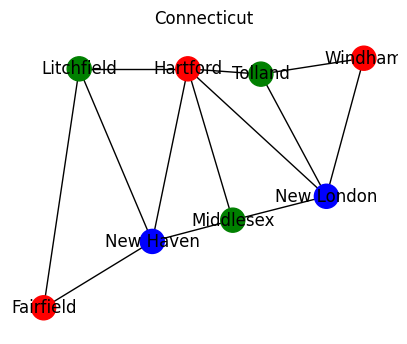

In [8]:
if connecticut_solution:
    draw_map("Connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 2. Color Connecticut with Three Colors

In [9]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green"], trace=True)

Trying red for Hartford
Trying blue for New Haven
Trying blue for New London
Trying green for Litchfield
Trying green for Middlesex
Trying green for Tolland
Trying red for Fairfield
Trying red for Windham


## Test Connecticut Solution

In [10]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

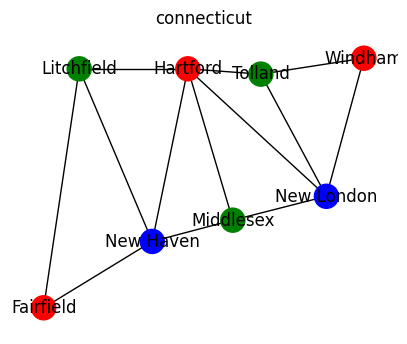

In [11]:
if connecticut_solution:
    draw_map("connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 3. Color Europe with Four Colors

In [12]:
europe_graph = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe_graph)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [13]:
europe_solution = color_map(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

## Test Europe Solution

In [14]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

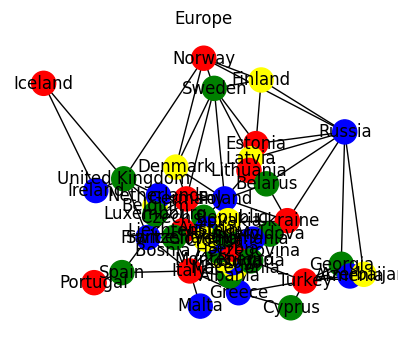

In [15]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 4. Color Europe with Three Colors

In [16]:
europe_solution = color_map(europe_graph, ["red", "blue", "green"], trace=False)

## Test Europe Solution

In [17]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

In [18]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 5. OPTIONAL. BONUS. Color Europe with Four Colors. 

Re-do Problem #3 (Color, Test, and Draw Europe with four colors) but instead of picking variables using the Degreee Heuristic, use the Minimum Remaining Values. 

In [19]:
def minimum_remaining_values(assignments, domains, nodes):
    unassigned_nodes = [node for node in nodes if node not in assignments]
    return min(unassigned_nodes, key=lambda n: len(domains[n]))

In [20]:
def color_map_mrv(constraint_graph, color_list, trace=False):
    nodes = constraint_graph["nodes"]
    edges = constraint_graph["edges"]
    
    # Initialize domains for each node
    domains = {node: list(color_list) for node in nodes}
    
    def backtrack(assignments):
        if len(assignments) == len(nodes):
            return assignments
        
        node = minimum_remaining_values(assignments, domains, nodes)
        for color in least_constrained_value(node, domains, assignments, nodes, edges):
            if trace:
                print(f"Trying {color} for {node}")
            
            assignments[node] = color
            local_domains = deepcopy(domains)
            
            if forward_check(node, color, domains, nodes, edges):
                result = backtrack(assignments)
                if result is not None:
                    return result
            
            assignments.pop(node)
            domains.update(local_domains)
        
        return None
    
    solution = backtrack({})
    if solution is None:
        return None
    
    return [(node, solution[node]) for node in nodes]

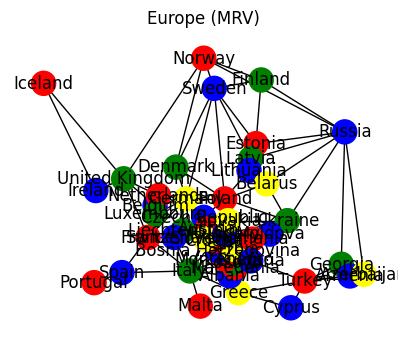

In [21]:
# Color Europe with 4 colors using MRV
europe_solution_mrv = color_map_mrv(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

# Test the solution
if europe_solution_mrv:
    test_coloring(europe_graph, europe_solution_mrv)

# Draw the map
if europe_solution_mrv:
    draw_map("Europe (MRV)", europe_graph, (5,4), europe_solution_mrv)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".